In [1]:
# Data manipulation, cleaning, aggregation, and plots.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Access data 
import os


### Data Collection

Reads in a list of CSV files which contain college data from 2000-2020. The file name for each CSV is stored in a list which will be coverted into a Pandas DataFrame. 

In [2]:
folder = r"./college_data"
all_files = os.listdir(folder)
college_data = [f for f in all_files if f.startswith('MERGED') if f.endswith('.csv')]

Each CSV file is joined with variable folder, which contains the file path. Each CSV filed is read in as a pandas dataframe and appended the list "dfs" (dataframes). 

In [3]:
dfs = []
for csv in college_data: 
    file_path = os.path.join(folder, csv)
    df = pd.read_csv(file_path, low_memory=False)
    dfs.append(df)

Because this will be relevant when working with this group of dataframes, each dataframe is assigned a column value which holds the year it is from. 

In [4]:
years = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15',
         '15-16', '16-17', '17-18', '18-19', '19-20']

if len(dfs) == len(years): 
    for i in range(len(dfs)): 
        dfs[i]['Year'] = years[i]



After the year column is added, every dataframe is concatenated to a one larger dataframe. 

In [5]:
colleges = pd.concat(dfs)

### Demographic Changes


The categorizations for demographic data changed in 2008 according to College Score Card. The academic years 2008-2009 and 2009-2010 contained underreported data for demographics, likely due to these changes in reporting. Therefore, years priror to the academic year 2009-2010 were omitted from the data. 

In [6]:
drop_years = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09', '09-10']
demo_years = colleges[~colleges['Year'].isin(drop_years)]

A demographic dataframe is created. This holds demographic percentages at each institution. The state and institution name are included. 

In [7]:
demo = demo_years[['Year', 'INSTNM', 'HIGHDEG','STABBR', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' ,'UGDS_NHPI' ,'UGDS_2MOR','UGDS_NRA','UGDS_UNKN'
]]

The demographic data frame is filtered to only include 4 year institutions. The code 4 comes from the College Score Card data documentation. 

In [8]:
demo = demo[demo["HIGHDEG"] == 4]

The first part of this project looks at the mean demographic change from the academic year 2008-2009 to 2019-2020. 

In [9]:
demo_time = demo[['Year', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' ,'UGDS_NHPI' ,'UGDS_2MOR','UGDS_NRA','UGDS_UNKN']]

In [10]:
demographs = ['White', 'Black', 'Hispanic', 'Asian', 'Native American/Alaskan Native', 'Native Hawaiian/Pacific Islander', 'Two+ Races', 'None Reported', 'Non-Citizen']

demo2010 = demo_time.loc[demo_time['Year'] == '10-11'].set_index('Year').dropna().mean()
demo2011 = demo_time.loc[demo_time['Year'] == '11-12'].set_index('Year').dropna().mean()
demo2012 = demo_time.loc[demo_time['Year'] == '12-13'].set_index('Year').dropna().mean()
demo2013 = demo_time.loc[demo_time['Year'] == '13-14'].set_index('Year').dropna().mean()
demo2014 = demo_time.loc[demo_time['Year'] == '14-15'].set_index('Year').dropna().mean()
demo2015 = demo_time.loc[demo_time['Year'] == '15-16'].set_index('Year').dropna().mean()
demo2016 = demo_time.loc[demo_time['Year'] == '16-17'].set_index('Year').dropna().mean()
demo2017 = demo_time.loc[demo_time['Year'] == '17-18'].set_index('Year').dropna().mean()
demo2018 = demo_time.loc[demo_time['Year'] == '18-19'].set_index('Year').dropna().mean()
demo2019 = demo_time.loc[demo_time['Year'] == '19-20'].set_index('Year').dropna().mean()


demo_mean_time = pd.concat([demo2010, demo2011, demo2012, demo2013, demo2014, demo2015, demo2016, demo2017, demo2018, demo2019], axis=1)
demo_mean_time = demo_mean_time.transpose()
demo_mean_time.index = ['10-11', '11-12', '12-13', '13-14', '14-15',
         '15-16', '16-17', '17-18', '18-19', '19-20']
demo_mean_time.columns = demographs

This first visual shows the demographic changes at 4 year institutions. The chart shows a steady decline in students identifying as White, overall. Another interesting aspect of this data to notice is that students identifying as non-citizens decreased, and students identifying as Hispanic increased. Something to further investigate could be immigration policy and it's potential impact on the enrollement of non-citizen students in 4 year institutions. 

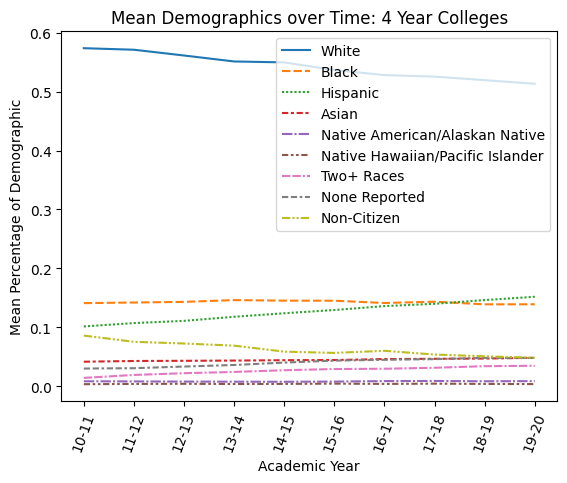

In [11]:
ax = sns.lineplot(data=demo_mean_time).set_title('Mean Demographics over Time: 4 Year Colleges')
plt.xlabel ('Academic Year')
plt.ylabel('Mean Percentage of Demographic')
plt.xticks(rotation=70)
plt.show()


In [12]:
demo2 = demo_years[['Year', 'INSTNM', 'HIGHDEG','STABBR', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' ,'UGDS_NHPI' ,'UGDS_2MOR','UGDS_NRA','UGDS_UNKN'
]]

In [13]:
demo2 = demo2[demo2["HIGHDEG"] == 2]

In [14]:
demo_time2 = demo2[['Year', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' ,'UGDS_NHPI' ,'UGDS_2MOR','UGDS_NRA','UGDS_UNKN']]

In [15]:
demo_time2

,Year,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,10-11,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,10-11,0.6869,0.2935,0.0051,0.0026,0.0051,0.0000,0.0000,0.0004,0.0064
12,10-11,0.4501,0.4701,0.0335,0.0058,0.0026,0.0032,0.0077,0.0019,0.0251
15,10-11,0.7037,0.2072,0.0379,0.0133,0.0090,0.0020,0.0102,0.0020,0.0149
16,10-11,0.7411,0.1919,0.0216,0.0079,0.0205,0.0011,0.0106,0.0007,0.0047
...,...,...,...,...,...,...,...,...,...,...
6146,19-20,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6164,19-20,0.8838,0.0207,0.0498,0.0083,0.0083,0.0000,0.0290,0.0000,0.0000
6180,19-20,0.2531,0.0617,0.1852,0.2284,0.0123,0.0494,0.1358,0.0000,0.0741
6185,19-20,0.0672,0.6208,0.2560,0.0272,0.0048,0.0032,0.0160,0.0000,0.0048


In [16]:
demo2_2010 = demo_time2.loc[demo_time2['Year'] == '10-11'].set_index('Year').dropna().mean()
demo2_2011 = demo_time2.loc[demo_time2['Year'] == '11-12'].set_index('Year').dropna().mean()
demo2_2012 = demo_time2.loc[demo_time2['Year'] == '12-13'].set_index('Year').dropna().mean()
demo2_2013 = demo_time2.loc[demo_time2['Year'] == '13-14'].set_index('Year').dropna().mean()
demo2_2014 = demo_time2.loc[demo_time2['Year'] == '14-15'].set_index('Year').dropna().mean()
demo2_2015 = demo_time2.loc[demo_time2['Year'] == '15-16'].set_index('Year').dropna().mean()
demo2_2016 = demo_time2.loc[demo_time2['Year'] == '16-17'].set_index('Year').dropna().mean()
demo2_2017 = demo_time2.loc[demo_time2['Year'] == '17-18'].set_index('Year').dropna().mean()
demo2_2018 = demo_time2.loc[demo_time2['Year'] == '18-19'].set_index('Year').dropna().mean()
demo2_2019 = demo_time2.loc[demo_time2['Year'] == '19-20'].set_index('Year').dropna().mean()

demo2_mean_time = pd.concat([demo2_2010, demo2_2011, 
                             demo2_2012, demo2_2013, demo2_2014, demo2_2015, demo2_2016, 
                             demo2_2017, demo2_2018, demo2_2019], axis=1)
demo2_mean_time = demo2_mean_time.transpose()
demo2_mean_time.index = ['10-11', '11-12', '12-13', '13-14', '14-15',
         '15-16', '16-17', '17-18', '18-19', '19-20']
demo2_mean_time.columns = demographs

The second visual looks at demographic changes at 2 year institutions. It can be noted there is a higher proportion of Black and Hispanic students enrolled at 2 year institutions. Additionally, there is a drop in enrollment of White students. 

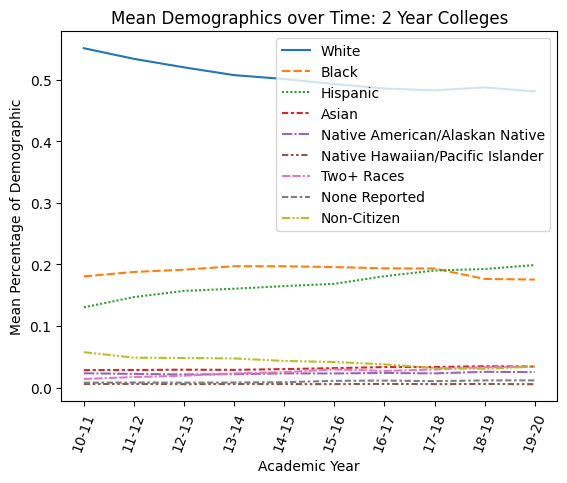

In [17]:
ax = sns.lineplot(data=demo2_mean_time).set_title('Mean Demographics over Time: 2 Year Colleges')
plt.xlabel ('Academic Year')
plt.ylabel('Mean Percentage of Demographic')
plt.xticks(rotation=70)
plt.show()

### Tuition Rates & Debt Over Time

The second part of this project examines tuition rates in relation to median debt held by student, both in state and out of state, over a 20 year period starting with the academic year of 2000-2001 and ending with the academic year of 2019-2020. 

The appropriate columns are selected to visualize the tuition and debt data. The data is selected by 4 year institutions, and null values are dropped from the dataset. 

In [18]:
tuition = colleges[['INSTNM', 'HIGHDEG', 'STABBR', 'DEBT_MDN', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'Year']]

In [19]:
tuition4 = tuition[tuition["HIGHDEG"] == 4].dropna()

In [20]:
tuition4 = tuition4[['DEBT_MDN', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'Year']]

This section takes a differet, and simplier approach to clean and prepare the data for Seaborn visualization. Data that is labelled "PrivarySupressed" is excluded from the dataset. An index is set to sort the data by year. All of the data is transformed to type "float" in order to calculate by the mean for each category at each academic year.

In [21]:
tuition4 = tuition4[tuition4["DEBT_MDN"].str.contains("PrivacySuppressed") == False].set_index('Year')

In [22]:
tuition4 = tuition4.astype(float)

In [23]:
tuition4_mean = tuition4.groupby(level = 0).mean()

Column names are created for more detailed visualization. 

In [24]:
tut_cols = ['Mean Debt', 'In State Tuition', 'Out of State Tuition']
tuition4_mean.columns = tut_cols

This graph shows the change in tuition over a 20 year year period as well as the median debt rate. The mean value was found for each academic year. Both out of state and in state have doubled over this span of time. Debt has risen as well. 

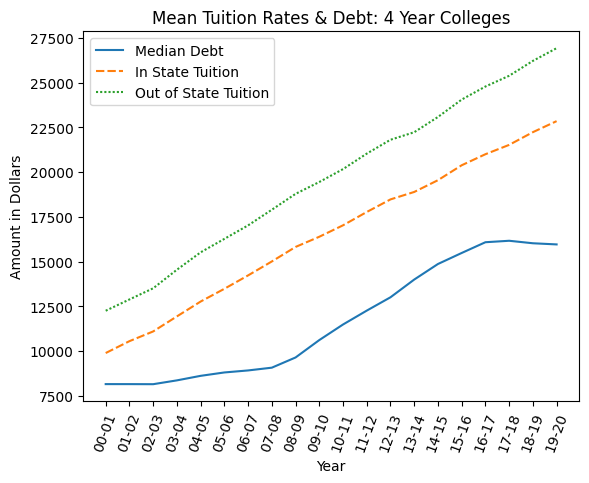

In [25]:
ax = sns.lineplot(data=tuition4_mean).set_title('Mean Tuition Rates & Debt: 4 Year Colleges')
plt.ylabel('Amount in Dollars')
plt.xticks(rotation=70)
plt.show()

As a comparison the median in state and out of state tuition is shown along side the median of the median tution at each institution over a 20 year period. 

In [26]:
tuition4_med = tuition4.groupby(level = 0).median()
tuition4_med.columns = tut_cols

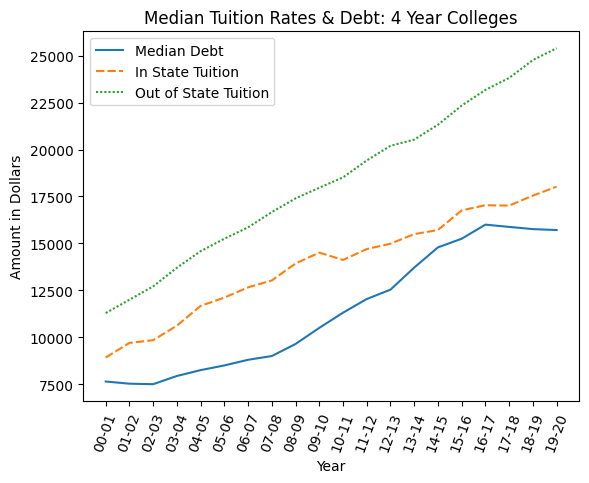

In [27]:
ax = sns.lineplot(data=tuition4_med).set_title('Median Tuition Rates & Debt: 4 Year Colleges')
plt.ylabel('Amount in Dollars')
plt.xticks(rotation=70)
plt.show()

The Collge Board data breaks debt down by different groups. These next two visualizations show the mean debt of debt medians by group across institutions for a 20 year period, and the median debt of debt medians across institutions for a 20 year period. 

In [28]:
debt = colleges[['HIGHDEG', 'Year', 'LO_INC_DEBT_MDN','MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN', 'WDRAW_DEBT_MDN', 'GRAD_DEBT_MDN', 'DEBT_MDN']]

In [29]:
debt = debt[debt["HIGHDEG"] == 4].dropna().set_index('Year')

In [30]:
debt = debt[['LO_INC_DEBT_MDN','MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN', 'WDRAW_DEBT_MDN', 'GRAD_DEBT_MDN', 'DEBT_MDN']]

In [31]:
debt_types = ['LO_INC_DEBT_MDN','MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'PELL_DEBT_MDN', 'NOPELL_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN', 'WDRAW_DEBT_MDN', 'GRAD_DEBT_MDN', 'DEBT_MDN']

In [32]:
for i in debt_types: 
    debt = debt[debt[i].str.contains("PrivacySuppressed") == False]

In [33]:
debt = debt.astype(float)

In [34]:
debt_mean = debt.groupby(level = 0).mean()

In [35]:
debt_cols = ['Low Income Debt', 'Middle Income Debt', 'High Income Debt', 'Dependent Debt', 'Independent Debt', 'Pell Grant Debt', 'No Pell Debt', 'Female Debt', 'Male Debt', 'First Gen. Debt', 'Not First Gen Debt', 'Withdraw Debt', 'Graduates Debt', 'Debt Median']

In [36]:
debt_mean.columns = debt_cols

This visualization shows the mean debt broken down by groups over a 20 year period. 

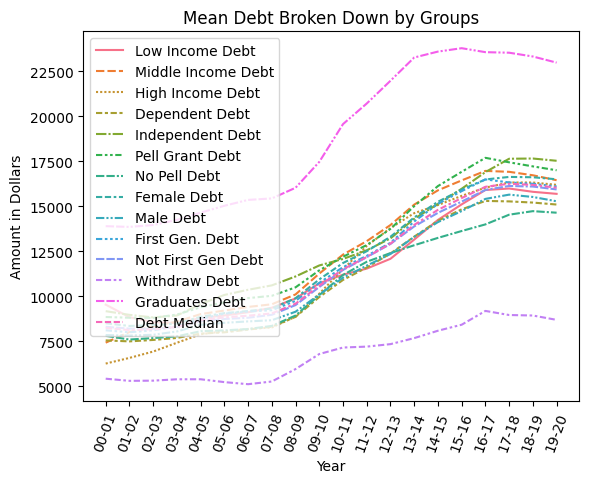

In [37]:
ax = sns.lineplot(data=debt_mean).set_title('Mean Debt Broken Down by Groups')
plt.ylabel('Amount in Dollars')
plt.xticks(rotation=70)
plt.show()

As a comparison the Median Debt by groups is shown. 

In [38]:
debt_med = debt.groupby(level = 0).median()

In [39]:
debt_med.columns = debt_cols

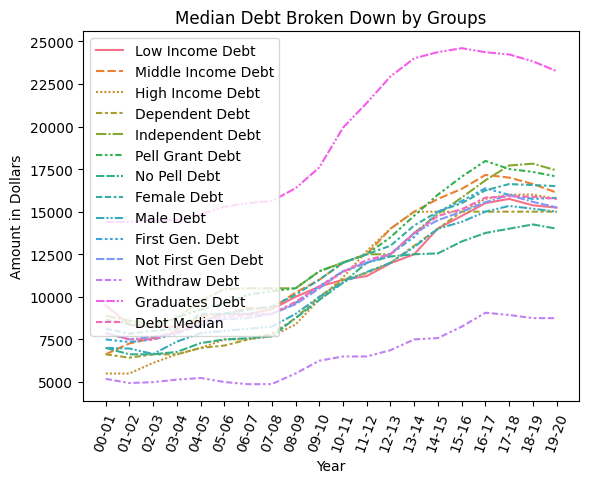

In [40]:
ax = sns.lineplot(data=debt_med).set_title('Median Debt Broken Down by Groups')
plt.ylabel('Amount in Dollars')
plt.xticks(rotation=70)
plt.show()

### Earnings

The part of the project looks at earnings, which are measured 6 years after a student graduates. Currently, earnings data is available from academic year 2003-2004 to 2014-2015. ACT midpoint data is avaiable starting 2009-2010. Therefore, this data looks at the academic years 2009-2010 to 2014-2015. 

The first example looks at various variables to determine if earnings may be correlated with another value. Admission rate, debt median, tution in state, tuition out of state, SAT average, ACT English midpoint, ACT Math midpoint, ACT Writing midpoint, and ACT Composite midpoint were selected from the dataset as possible variables that may correlate with earnings 6 years after graduation of a 4 year institution. 

In [41]:
earnings = colleges[['Year', 'ADM_RATE','DEBT_MDN','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'ACTCMMID','ACTMTMID', 'ACTWRMID', 'ACTENMID', 'MN_EARN_WNE_P6', 'HIGHDEG']]

In [42]:
earnings = earnings[earnings['HIGHDEG'] == 4].dropna().set_index('Year')

In [43]:
earnings

,ADM_RATE,DEBT_MDN,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,ACTCMMID,ACTMTMID,ACTWRMID,ACTENMID,MN_EARN_WNE_P6,HIGHDEG
Year,,,,,,,,,,,
09-10,0.5870,11437.5,7000.0,19200.0,1122.0,25.0,24.0,7.0,25.0,38500,4
09-10,0.7950,11000,6972.0,19452.0,1184.0,26.0,25.0,6.0,27.0,41700,4
09-10,0.5501,14625.5,25450.0,25450.0,1084.0,24.0,23.0,7.0,25.0,35000,4
09-10,0.7291,9000,6632.0,17858.0,1053.0,23.0,22.0,7.0,22.0,36200,4
09-10,0.5631,15375,36764.0,36764.0,1226.0,27.0,27.0,9.0,28.0,46400,4
...,...,...,...,...,...,...,...,...,...,...,...
14-15,0.8452,12612,12262.0,33381.0,979.0,21.0,21.0,7.0,20.0,50300,4
14-15,0.5888,11000,6118.0,25162.0,1059.0,23.0,23.0,8.0,23.0,36500,4
14-15,0.3534,14809,5821.0,16735.0,1162.0,26.0,25.0,8.0,26.0,39400,4


In [44]:
earnings = earnings[earnings["MN_EARN_WNE_P6"].str.contains("PrivacySuppressed") == False].drop('HIGHDEG', axis= 'columns')
earnings = earnings[earnings["DEBT_MDN"].str.contains("PrivacySuppressed") == False]

In [45]:
earnings

,ADM_RATE,DEBT_MDN,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,ACTCMMID,ACTMTMID,ACTWRMID,ACTENMID,MN_EARN_WNE_P6
Year,,,,,,,,,,
09-10,0.5870,11437.5,7000.0,19200.0,1122.0,25.0,24.0,7.0,25.0,38500
09-10,0.7950,11000,6972.0,19452.0,1184.0,26.0,25.0,6.0,27.0,41700
09-10,0.5501,14625.5,25450.0,25450.0,1084.0,24.0,23.0,7.0,25.0,35000
09-10,0.7291,9000,6632.0,17858.0,1053.0,23.0,22.0,7.0,22.0,36200
09-10,0.5631,15375,36764.0,36764.0,1226.0,27.0,27.0,9.0,28.0,46400
...,...,...,...,...,...,...,...,...,...,...
14-15,0.8452,12612,12262.0,33381.0,979.0,21.0,21.0,7.0,20.0,50300
14-15,0.5888,11000,6118.0,25162.0,1059.0,23.0,23.0,8.0,23.0,36500
14-15,0.3534,14809,5821.0,16735.0,1162.0,26.0,25.0,8.0,26.0,39400


In [46]:
earnings = earnings.astype(float)

This provides an example of how numpy and pandas can be used together to find corelation coefficients between potential variables. The highest correlation is noted. 

In [47]:

coef_list = []
for col in earnings.columns:
    coef = np.corrcoef(earnings[col],earnings['MN_EARN_WNE_P6'])[0,1] 
    if coef < 0.99999: 
        coef_list.append([col, abs(coef)])
    


coef_dict = dict(coef_list)
coef_series = pd.Series(coef_dict)

max_coef_nox = coef_series.idxmax()
print(coef_list)

print('The variable that produces max coefficent to predict earnings values is:', max_coef_nox)
print("Correlation coefficient = ", np.corrcoef(earnings['ACTMTMID'],earnings['MN_EARN_WNE_P6'])[0,1])


[['ADM_RATE', 0.5259262401040675], ['DEBT_MDN', 0.14162139243020555], ['TUITIONFEE_IN', 0.5189804933569153], ['TUITIONFEE_OUT', 0.6304348034844375], ['SAT_AVG', 0.7210298078933892], ['ACTCMMID', 0.7074799889906178], ['ACTMTMID', 0.7361772303801927], ['ACTWRMID', 0.4710406537196278], ['ACTENMID', 0.6641892899157895]]
The variable that produces max coefficent to predict earnings values is: ACTMTMID
Correlation coefficient =  0.7361772303801927


The highest correlation coefficient is determined to be the midpoint of ACT math scores for future earning potentials. This may indicate that institutions that require higher ACT math scores specialize in fields such as engineering and math, which may have a higher earning potential. However, more analysis on major choice and earning potential would need to be explored. 

This section demonstrates an Ordinary Least Squares model and visual of the variable with the highest correlation coefficent. Below is an OLS model using the statsmodel python library, and a visual as well. 

In [48]:
x = earnings.ACTMTMID
y = earnings.MN_EARN_WNE_P6  # response (dependent variable)
x = sm.add_constant(x)  # Adds a constant term to the predictor
lr_model = sm.OLS(y, x).fit() 
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:         MN_EARN_WNE_P6   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1119.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          1.43e-162
Time:                        18:28:31   Log-Likelihood:                -9905.4
No. Observations:                 948   AIC:                         1.981e+04
Df Residuals:                     946   BIC:                         1.982e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.406e+04   1661.802     -8.460      0.0

Below is a graph of the OLS model of Future Earnings and ACT Midpoint Math Scores from 2003-2015. 

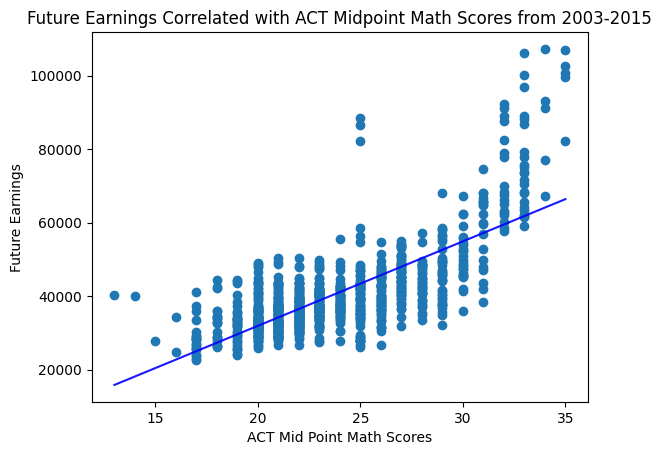

In [49]:
x_prime = np.linspace(x.ACTMTMID.min(), x.ACTMTMID.max(), 100)
x_prime = sm.add_constant(x_prime)
y_hat = lr_model.predict(x_prime)
plt.scatter(x.ACTMTMID, y)
plt.xlabel('ACT Mid Point Math Scores')
plt.ylabel('Future Earnings')
plt.title('Future Earnings Correlated with ACT Midpoint Math Scores from 2003-2015')
plt.plot(x_prime[:, 1], y_hat, 'blue', alpha = 0.9)

In [50]:
earnings_box = colleges[['Year', 'HIGHDEG', 'MN_EARN_WNE_P6']].dropna()
earnings_box = earnings_box[earnings_box["HIGHDEG"] == 4]
earnings_box = earnings_box[earnings_box["MN_EARN_WNE_P6"].str.contains("PrivacySuppressed") == False].drop('HIGHDEG', axis= 'columns')


In [51]:
earnings_box = earnings_box.set_index('Year').astype(int)

Finally, for the earnings section, a box plot is made to show the distribution of earnings for each year in this data segment. 

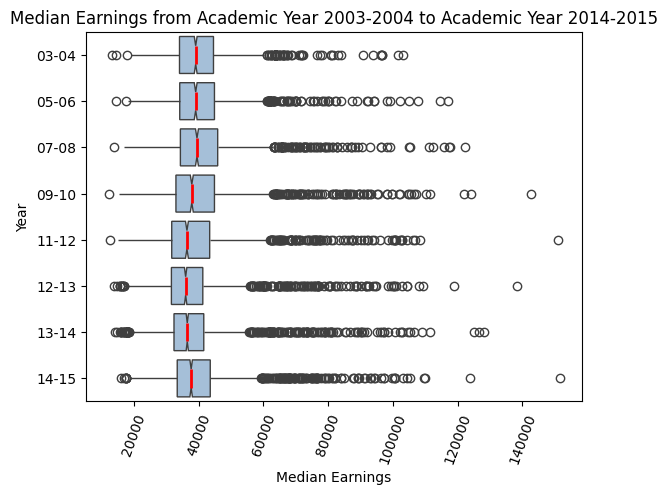

In [52]:
ax = sns.boxplot(
    x = earnings_box['MN_EARN_WNE_P6'], y = earnings_box.index,
    notch=True, showcaps=False,
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
).set_title('Median Earnings from Academic Year 2003-2004 to Academic Year 2014-2015')
plt.xlabel('Median Earnings')
plt.xticks(rotation=70)
plt.show()

### Admission Rates

This section looks at trends in admission rates based on SAT and ACT scores. SAT scores are also broken down into sections: Math and Verbal. 

In [53]:
admin = colleges[['Year', 'HIGHDEG', 'ADM_RATE', 'SATMTMID', 'SATVRMID', 'ACTCMMID', 'SAT_AVG']]

In [54]:
admin = admin[admin['HIGHDEG'] == 4]

In [55]:
admin_2019 = admin.loc[admin['Year'] == '19-20'].set_index('Year').dropna().drop('HIGHDEG', axis='columns')

In [56]:
admin_2019

,ADM_RATE,SATMTMID,SATVRMID,ACTCMMID,SAT_AVG
Year,,,,,
19-20,0.9175,455.0,470.0,17.0,939.0
19-20,0.7366,608.0,620.0,26.0,1234.0
19-20,0.8257,695.0,669.0,28.0,1319.0
19-20,0.9690,470.0,480.0,17.0,946.0
19-20,0.8268,605.0,605.0,27.0,1261.0
...,...,...,...,...,...
19-20,0.7522,565.0,575.0,23.0,1144.0
19-20,0.9891,598.0,582.0,25.0,1208.0
19-20,0.8458,525.0,525.0,21.0,1053.0


This histogram shows admission rates for all 4 year colleges from 2019-2020. 

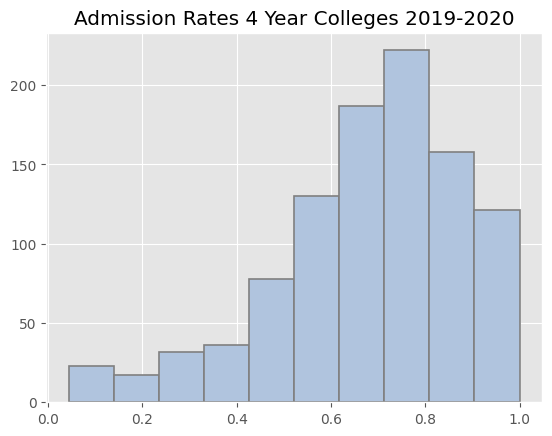

In [57]:
adm = admin_2019['ADM_RATE']
plt.style.use('ggplot')
plt.hist(adm, color='lightsteelblue',edgecolor='gray', linewidth=1.2)
plt.title("Admission Rates 4 Year Colleges 2019-2020")

plt.show()

This histogram shows SAT Average scores for all 4 year colleges from 2019-2020. 

Text(0.5, 1.0, 'SAT Avg Scores Colleges 2019-2020')

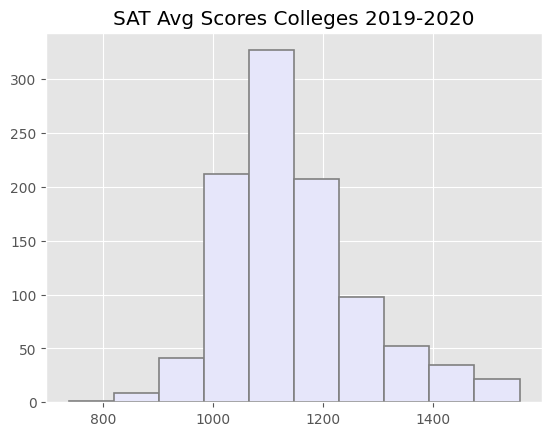

In [58]:
sats = admin_2019['SAT_AVG']
plt.style.use('ggplot')
plt.hist(sats, color='lavender',edgecolor='gray', linewidth=1.2)
plt.title("SAT Avg Scores Colleges 2019-2020")

SAT scores are then fitted to a normal distribution. 

Text(0.5, 1.0, 'Fitted Norm PDF & Histogram SAT Scores 2019-2020')

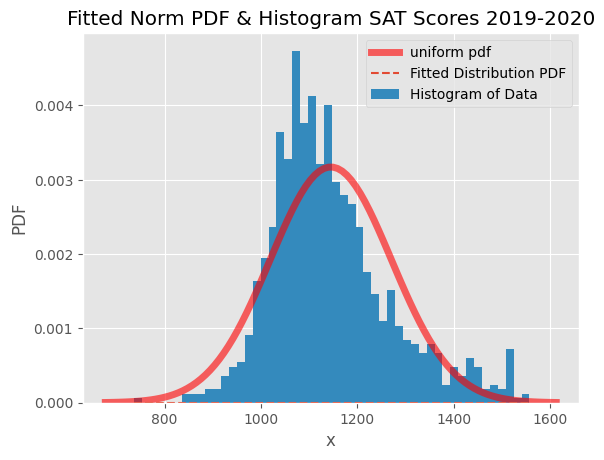

In [59]:
avgsat = sats.mean()
stdsat = sats.std()
dist_sat =  stats.norm(loc=avgsat, scale = stdsat)
dia_sat = np.linspace(dist_sat.ppf(0.0001),
                dist_sat.ppf(0.9999), 100)

fitsatscore = stats.fit(stats.norm, sats)
fig, ax = plt.subplots(1, 1)
ax.plot(dia_sat, dist_sat.pdf(dia_sat),
       'r-', lw=5, alpha=0.6, label='uniform pdf')
fitsatscore.plot().set_title('Fitted Norm PDF & Histogram SAT Scores 2019-2020')

This histogram shows SAT Average Math scores for all 4 year colleges from 2019-2020. 

Text(0.5, 1.0, 'SAT Avg Math Scores Colleges 2019-2020')

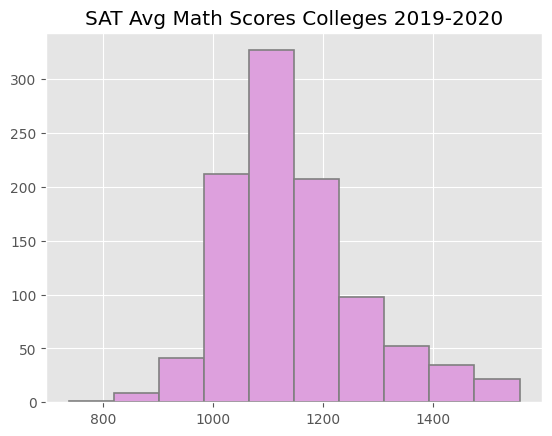

In [60]:
sat_math = admin_2019['SATMTMID']
plt.style.use('ggplot')
plt.hist(sats, color='plum',edgecolor='gray', linewidth=1.2)
plt.title("SAT Avg Math Scores Colleges 2019-2020")

SAT Math scores are then fitted to a normal distribution. 

Text(0.5, 1.0, 'Fitted Norm PDF & Histogram SAT Math Scores 2019-2020')

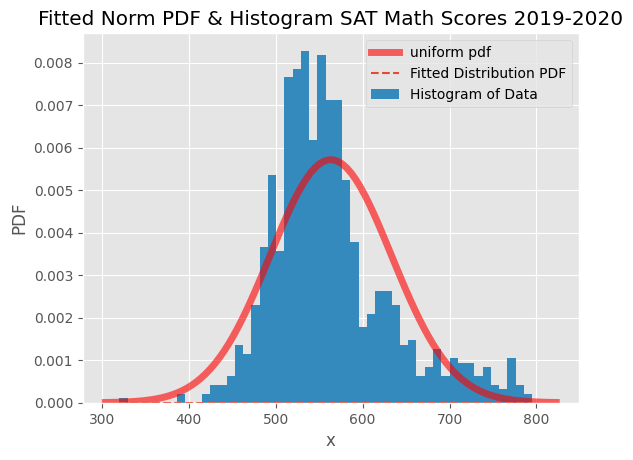

In [61]:
avgsatmt = sat_math.mean()
stdsatmt = sat_math.std()
dist_satmt =  stats.norm(loc=avgsatmt, scale = stdsatmt)
dia_satmt = np.linspace(dist_satmt.ppf(0.0001),
                dist_satmt.ppf(0.9999), 100)

fitsatscore = stats.fit(stats.norm, sat_math)
fig, ax = plt.subplots(1, 1)
ax.plot(dia_satmt, dist_satmt.pdf(dia_satmt),
       'r-', lw=5, alpha=0.6, label='uniform pdf')
fitsatscore.plot().set_title('Fitted Norm PDF & Histogram SAT Math Scores 2019-2020')

This histogram shows SAT Average Verbal scores for all 4 year colleges from 2019-2020. 

Text(0.5, 1.0, 'SAT Avg Verbal Scores Colleges 2019-2020')

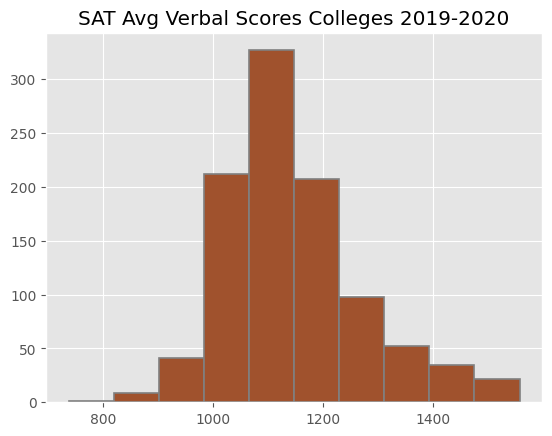

In [62]:
sat_vr = admin_2019['SATVRMID']
plt.style.use('ggplot')
plt.hist(sats, color='sienna',edgecolor='gray', linewidth=1.2)
plt.title("SAT Avg Verbal Scores Colleges 2019-2020")

SAT Verbal scores are then fitted to a normal distribution.

Text(0.5, 1.0, 'Fitted Norm PDF & Histogram SAT Verbal Scores 2019-2020')

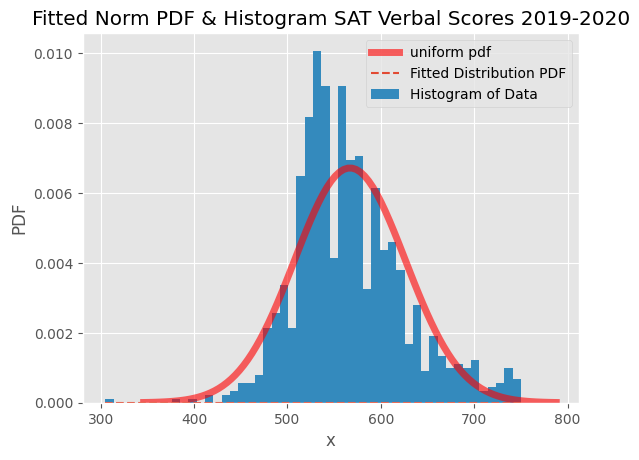

In [63]:
avgsatvr = sat_vr.mean()
stdsatvr = sat_vr.std()
dist_satvr =  stats.norm(loc=avgsatvr, scale = stdsatvr)
dia_satvr = np.linspace(dist_satvr.ppf(0.0001),
                dist_satvr.ppf(0.9999), 100)

fitsatscore = stats.fit(stats.norm, sat_vr)
fig, ax = plt.subplots(1, 1)
ax.plot(dia_satvr, dist_satvr.pdf(dia_satvr),
       'r-', lw=5, alpha=0.6, label='uniform pdf')
fitsatscore.plot().set_title('Fitted Norm PDF & Histogram SAT Verbal Scores 2019-2020')

This histogram shows ACT cummulative midpoint scores for all 4 year colleges from 2019-2020. 

Text(0.5, 1.0, 'ACT Cummulative Midpoint Scores Colleges 2019-2020')

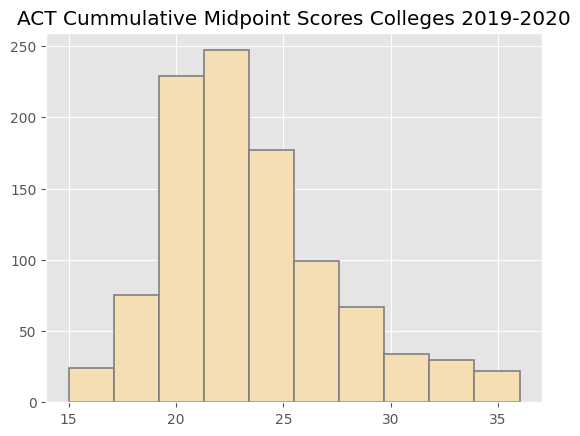

In [64]:
act = admin_2019['ACTCMMID']
plt.style.use('ggplot')
plt.hist(act, color='wheat',edgecolor='gray', linewidth=1.2)
plt.title("ACT Cummulative Midpoint Scores Colleges 2019-2020")

ACT cummulatives scores are then fitted to a normal distribution. 

Text(0.5, 1.0, 'Fitted Norm PDF & Histogram ACT Scores 2019-2020')

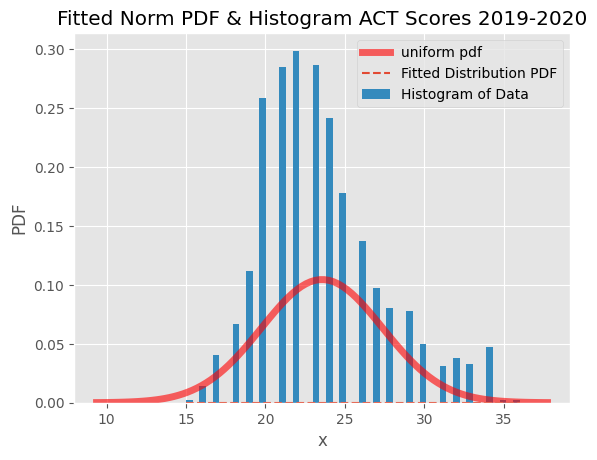

In [65]:
avgact = act.mean()
stdact = act.std()
dist_act =  stats.norm(loc=avgact, scale = stdact)
dia_act = np.linspace(dist_act.ppf(0.0001),
                dist_act.ppf(0.9999), 100)

fitactscore = stats.fit(stats.norm, act)
fig, ax = plt.subplots(1, 1)
ax.plot(dia_act, dist_act.pdf(dia_act),
       'r-', lw=5, alpha=0.6, label='uniform pdf')
fitactscore.plot().set_title('Fitted Norm PDF & Histogram ACT Scores 2019-2020')

This histogram shows ACT Math cummulative midpoint scores for all 4 year colleges from 2019-2020. 

Boolean masking is used to find all colleges with an admission rate of less than 20%, these are consider competitive institutions. 

In [66]:
admrates = admin_2019[admin_2019['ADM_RATE'] <= 0.20]

In [67]:
admrates

,ADM_RATE,SATMTMID,SATVRMID,ACTCMMID,SAT_AVG
Year,,,,,
19-20,0.0642,795.0,750.0,36.0,1557.0
19-20,0.1625,735.0,695.0,33.0,1449.0
19-20,0.1232,720.0,695.0,32.0,1429.0
19-20,0.1030,735.0,700.0,33.0,1449.0
19-20,0.1142,740.0,705.0,33.0,1453.0
19-20,0.0608,770.0,745.0,34.0,1517.0
19-20,0.1436,740.0,725.0,33.0,1473.0
19-20,0.1560,740.0,705.0,33.0,1453.0
19-20,0.0617,785.0,750.0,34.0,1528.0


Using this boolean masking, the data is aggregated to show statistical information at competitive institutions. 

In [68]:
print('Median Average SAT Score at Highly Competitive Schools: ', admrates['SAT_AVG'].median())
print('Maximum Average SAT Score at Highly Competitive Schools:', admrates['SAT_AVG'].max())
print('Minimum Average SAT Score at Highly Competitive Schools:', admrates['SAT_AVG'].min())
print('Median Cummulative ACT Midpoint Score at Highly Competitive Schools:', admrates['ACTCMMID'].median())
print('Maximum Cummulative ACT Midpoint Score at Highly Competitive Schools:', admrates['ACTCMMID'].max())
print('Minimum Cummulative ACT Midpoint Score at Highly Competitive Schools:', admrates['ACTCMMID'].min())
print('Number of colleges with an acceptance rate of 20% or less: ', admrates['ADM_RATE'].count())

Median Average SAT Score at Highly Competitive Schools:  1495.0
Maximum Average SAT Score at Highly Competitive Schools: 1557.0
Minimum Average SAT Score at Highly Competitive Schools: 1020.0
Median Cummulative ACT Midpoint Score at Highly Competitive Schools: 34.0
Maximum Cummulative ACT Midpoint Score at Highly Competitive Schools: 36.0
Minimum Cummulative ACT Midpoint Score at Highly Competitive Schools: 20.0
Number of colleges with an acceptance rate of 20% or less:  36


Boolean masking is used to find all colleges with an admission rate of greater than 80%, these are considered inclusive institutions. 

In [69]:
admrates_inc = admin_2019[admin_2019['ADM_RATE'] > 0.80]

In [70]:
admrates_inc

,ADM_RATE,SATMTMID,SATVRMID,ACTCMMID,SAT_AVG
Year,,,,,
19-20,0.9175,455.0,470.0,17.0,939.0
19-20,0.8257,695.0,669.0,28.0,1319.0
19-20,0.9690,470.0,480.0,17.0,946.0
19-20,0.8268,605.0,605.0,27.0,1261.0
19-20,0.9044,515.0,520.0,21.0,1082.0
...,...,...,...,...,...
19-20,0.9856,515.0,530.0,20.0,1048.0
19-20,0.9416,485.0,500.0,19.0,990.0
19-20,0.8148,535.0,555.0,23.0,1102.0


Using this boolean masking, the data is aggregated to show statistical information at inclusive institutions.

In [71]:
print('Median Average SAT Score at Inclusive Schools: ', admrates_inc['SAT_AVG'].median())
print('Maximum Average SAT Score at Inclusive Schools:', admrates_inc['SAT_AVG'].max())
print('Minimum Average SAT Score at Inclusive Schools:', admrates_inc['SAT_AVG'].min())
print('Median Cummulative ACT Midpoint Score at Inclusive Schools:', admrates_inc['ACTCMMID'].median())
print('Maximum Cummulative ACT Midpoint Score at Inclusive Schools:', admrates_inc['ACTCMMID'].max())
print('Minimum Cummulative ACT Midpoint Score at Inclusive Schools:', admrates_inc['ACTCMMID'].min())
print('Number of colleges with an acceptance rate of 80% or more: ', admrates_inc['ADM_RATE'].count())

Median Average SAT Score at Inclusive Schools:  1100.0
Maximum Average SAT Score at Inclusive Schools: 1337.0
Minimum Average SAT Score at Inclusive Schools: 861.0
Median Cummulative ACT Midpoint Score at Inclusive Schools: 22.0
Maximum Cummulative ACT Midpoint Score at Inclusive Schools: 29.0
Minimum Cummulative ACT Midpoint Score at Inclusive Schools: 17.0
Number of colleges with an acceptance rate of 80% or more:  301


Boolean masking is used to find all colleges with an admission rate of greater than 20% and less than or equal to 50%, these are selective schools. 

In [72]:
admrates_selective_mask =(admin_2019['ADM_RATE'] > 0.20) & (admin_2019['ADM_RATE'] <= 0.50)

In [73]:
admrates_selective = admin_2019[admrates_selective_mask]
admrates_selective

,ADM_RATE,SATMTMID,SATVRMID,ACTCMMID,SAT_AVG
Year,,,,,
19-20,0.3493,460.0,480.0,20.0,1041.0
19-20,0.4566,520.0,565.0,24.0,1166.0
19-20,0.4978,553.0,560.0,23.0,1131.0
19-20,0.4394,485.0,485.0,18.0,978.0
19-20,0.2842,680.0,660.0,29.0,1342.0
...,...,...,...,...,...
19-20,0.4386,505.0,525.0,19.0,1026.0
19-20,0.4316,525.0,535.0,18.0,1014.0
19-20,0.4682,420.0,420.0,19.0,899.0


Using this boolean masking, the data is aggregated to show statistical information at selective institutions.

In [74]:
print('Median Average SAT Score at Selective Schools: ', admrates_selective['SAT_AVG'].median())
print('Maximum Average SAT Score at Selective Schools:', admrates_selective['SAT_AVG'].max())
print('Minimum Average SAT Score at Selective Schools:', admrates_selective['SAT_AVG'].min())
print('Median Cummulative ACT Midpoint Score at Selective Schools:', admrates_selective['ACTCMMID'].median())
print('Maximum Cummulative ACT Midpoint Score at Selective Schools:', admrates_selective['ACTCMMID'].max())
print('Minimum Cummulative ACT Midpoint Score at Selective Schools:', admrates_selective['ACTCMMID'].min())
print('Number of colleges with an acceptance rate of more than 20% but less than 50%: ', admrates_selective['ADM_RATE'].count())

Median Average SAT Score at Selective Schools:  1234.5
Maximum Average SAT Score at Selective Schools: 1448.0
Minimum Average SAT Score at Selective Schools: 880.0
Median Cummulative ACT Midpoint Score at Selective Schools: 27.0
Maximum Cummulative ACT Midpoint Score at Selective Schools: 33.0
Minimum Cummulative ACT Midpoint Score at Selective Schools: 16.0
Number of colleges with an acceptance rate of more than 20% but less than 50%:  130


Boolean masking is used to find all colleges with an admission rate of greater than 50% and less than or equal to 80%, these are selective schools. 

In [75]:
admrates_nonselective_mask =(admin_2019['ADM_RATE'] > 0.50) & (admin_2019['ADM_RATE'] <= 0.80)

In [76]:
admrates_nonselective = admin_2019[admrates_nonselective_mask]
admrates_nonselective

,ADM_RATE,SATMTMID,SATVRMID,ACTCMMID,SAT_AVG
Year,,,,,
19-20,0.7366,608.0,620.0,26.0,1234.0
19-20,0.7833,535.0,545.0,21.0,1066.0
19-20,0.5479,510.0,535.0,21.0,1084.0
19-20,0.5320,565.0,570.0,23.0,1135.0
19-20,0.6473,467.0,514.0,20.0,1010.0
...,...,...,...,...,...
19-20,0.7196,545.0,545.0,22.0,1100.0
19-20,0.7286,549.0,575.0,23.0,1134.0
19-20,0.7593,545.0,568.0,23.0,1119.0


Using this boolean masking, the data is aggregated to show statistical information at non-selective institutions.

In [77]:
print('Median Average SAT Score at Non Selective Schools: ', admrates_nonselective['SAT_AVG'].median())
print('Maximum Average SAT Score at Non Selective Schools:', admrates_nonselective['SAT_AVG'].max())
print('Minimum Average SAT Score at Non Selective Schools:', admrates_nonselective['SAT_AVG'].min())
print('Median Cummulative ACT Midpoint Score at Non Selective Schools:', admrates_nonselective['ACTCMMID'].median())
print('Maximum Cummulative ACT Midpoint Score at Non Selective Schools:', admrates_nonselective['ACTCMMID'].max())
print('Minimum Cummulative ACT Midpoint Score at Non Selective Schools:', admrates_nonselective['ACTCMMID'].min())
print('Number of colleges with an acceptance rate of more than 50% but less than 80%: ', admrates_nonselective['ADM_RATE'].count())

Median Average SAT Score at Non Selective Schools:  1122.0
Maximum Average SAT Score at Non Selective Schools: 1420.0
Minimum Average SAT Score at Non Selective Schools: 737.0
Median Cummulative ACT Midpoint Score at Non Selective Schools: 23.0
Maximum Cummulative ACT Midpoint Score at Non Selective Schools: 32.0
Minimum Cummulative ACT Midpoint Score at Non Selective Schools: 15.0
Number of colleges with an acceptance rate of more than 50% but less than 80%:  537


Finally, visualizatons are made based on classification dervied from acceptance rates. 

In [78]:
collegetype = ['Highly Competitive', 'Selective', 'Non-Selective', 'Inclusive']

Median SAT scores are show with respect to college classification.

In [79]:
comp_sat = admrates['SAT_AVG'].median()
s_sat = admrates_selective['SAT_AVG'].median()
nons_sat = admrates_nonselective['SAT_AVG'].median()
inc_sat = admrates_inc['SAT_AVG'].median()

satavg = [comp_sat, s_sat, nons_sat, inc_sat]

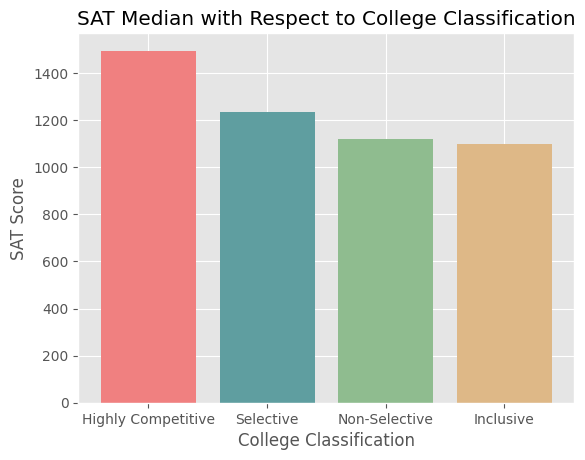

In [80]:
fig, ax = plt.subplots()


bar_colors = ['lightcoral', 'cadetblue', 'darkseagreen', 'burlywood']

ax.bar(collegetype, satavg, color=bar_colors)

ax.set_ylabel('SAT Score')
ax.set_xlabel('College Classification')
ax.set_title('SAT Median with Respect to College Classification')


plt.show()

Median ACT scores are show with respect to college classification.

In [81]:
comp_act = admrates['ACTCMMID'].median()
s_act = admrates_selective['ACTCMMID'].median()
nons_act = admrates_nonselective['ACTCMMID'].median()
inc_act = admrates_inc['ACTCMMID'].median()

actavg = [comp_act, s_act, nons_act, inc_act]

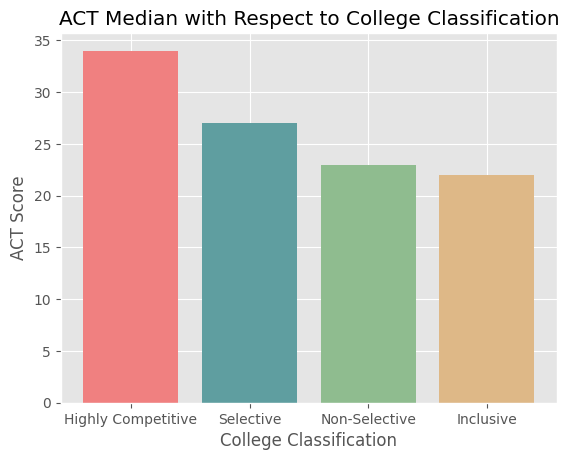

In [82]:
fig, ax = plt.subplots()


bar_colors = ['lightcoral', 'cadetblue', 'darkseagreen', 'burlywood']

ax.bar(collegetype, actavg, color=bar_colors)

ax.set_ylabel('ACT Score')
ax.set_xlabel('College Classification')
ax.set_title('ACT Median with Respect to College Classification')


plt.show()

The number of colleges are shown within each type of classification. 

In [83]:
comp_count = admrates['ACTCMMID'].count()
s_count = admrates_selective['ACTCMMID'].count()
nons_count = admrates_nonselective['ACTCMMID'].count()
inc_count = admrates_inc['ACTCMMID'].count()

count = [comp_count, s_count, nons_count, inc_count]

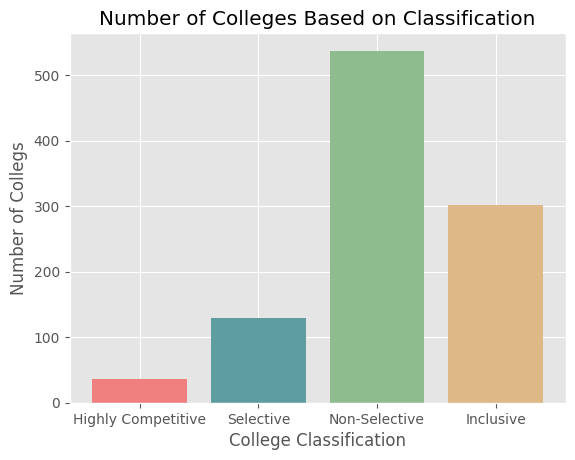

In [84]:
fig, ax = plt.subplots()


bar_colors = ['lightcoral', 'cadetblue', 'darkseagreen', 'burlywood']

ax.bar(collegetype, count, color=bar_colors)

ax.set_ylabel('Number of Collegs')
ax.set_xlabel('College Classification')
ax.set_title('Number of Colleges Based on Classification')


plt.show()

Data Source: 
US Department of Education College Score Card: https://collegescorecard.ed.gov/